In [1]:
pip install numpy pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


/var/folders/ph/p1vj8rc92lv0zyjr4zq8dhj00000gn/T/ipykernel_20159/2272977957.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1})
/var/folders/ph/p1vj8rc92lv0zyjr4zq8dhj00000gn/T/ipykernel_20159/2272977957.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['CP'] = data['CP'].replace({'No': 0, 'Yes': 1})


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


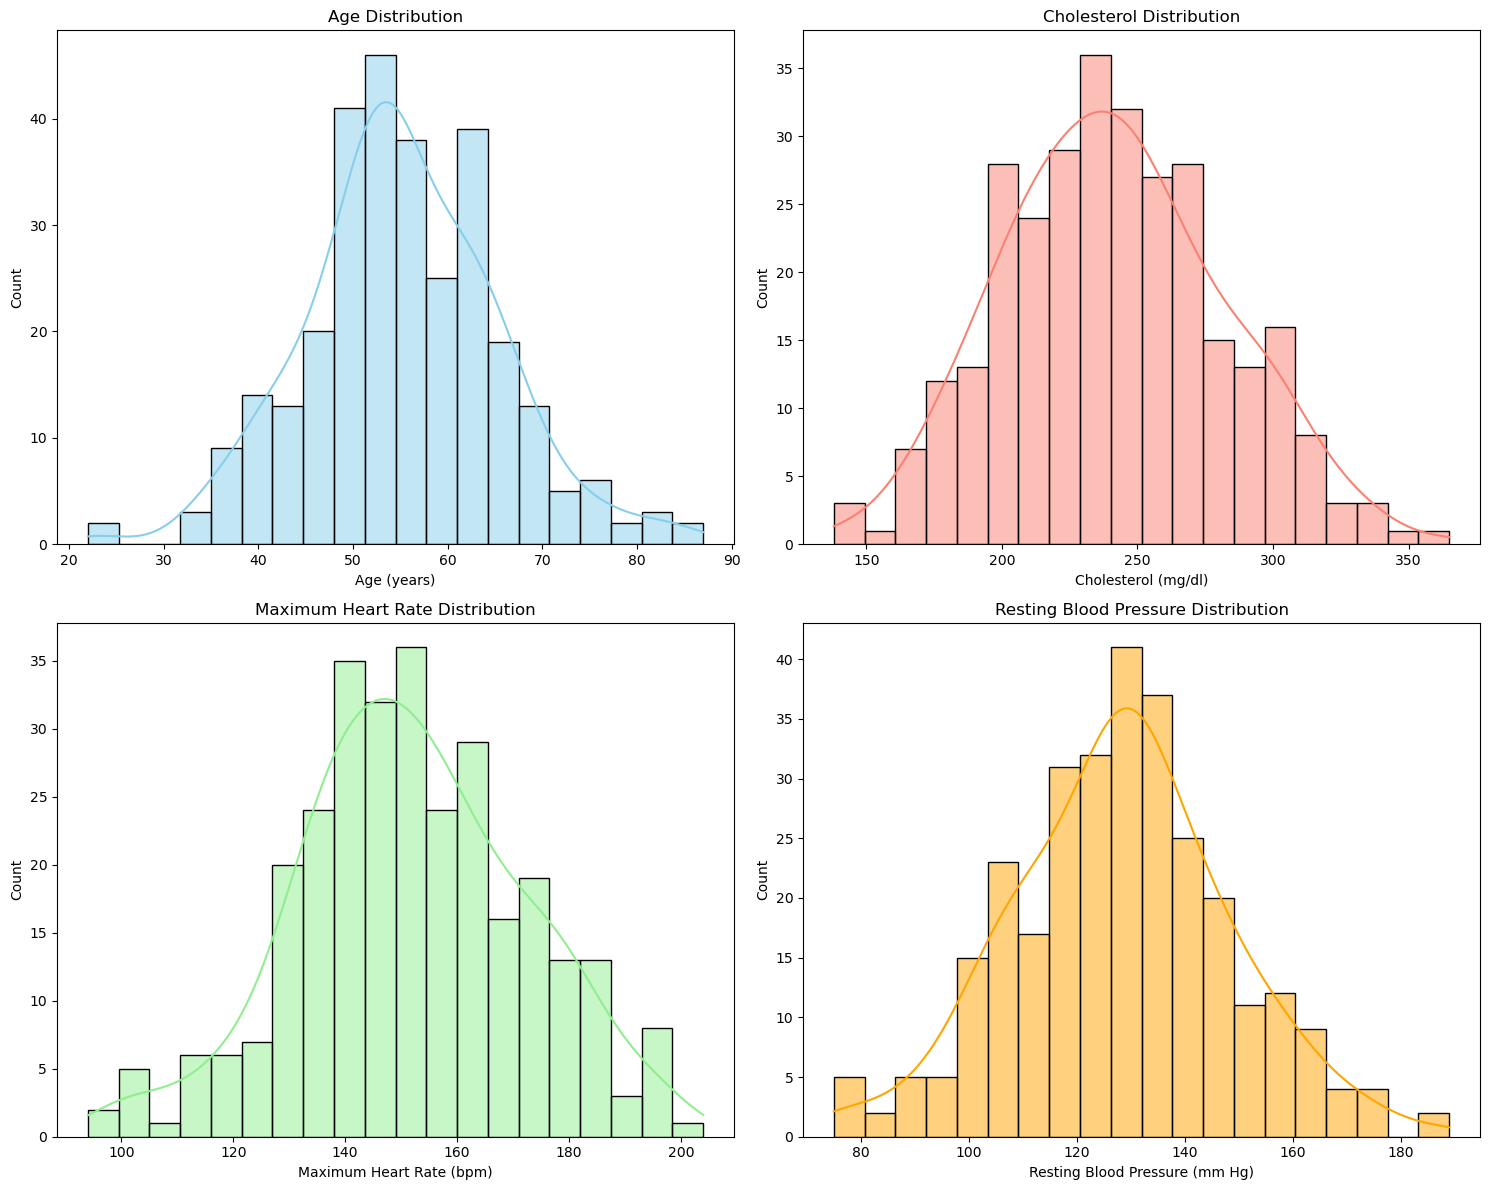

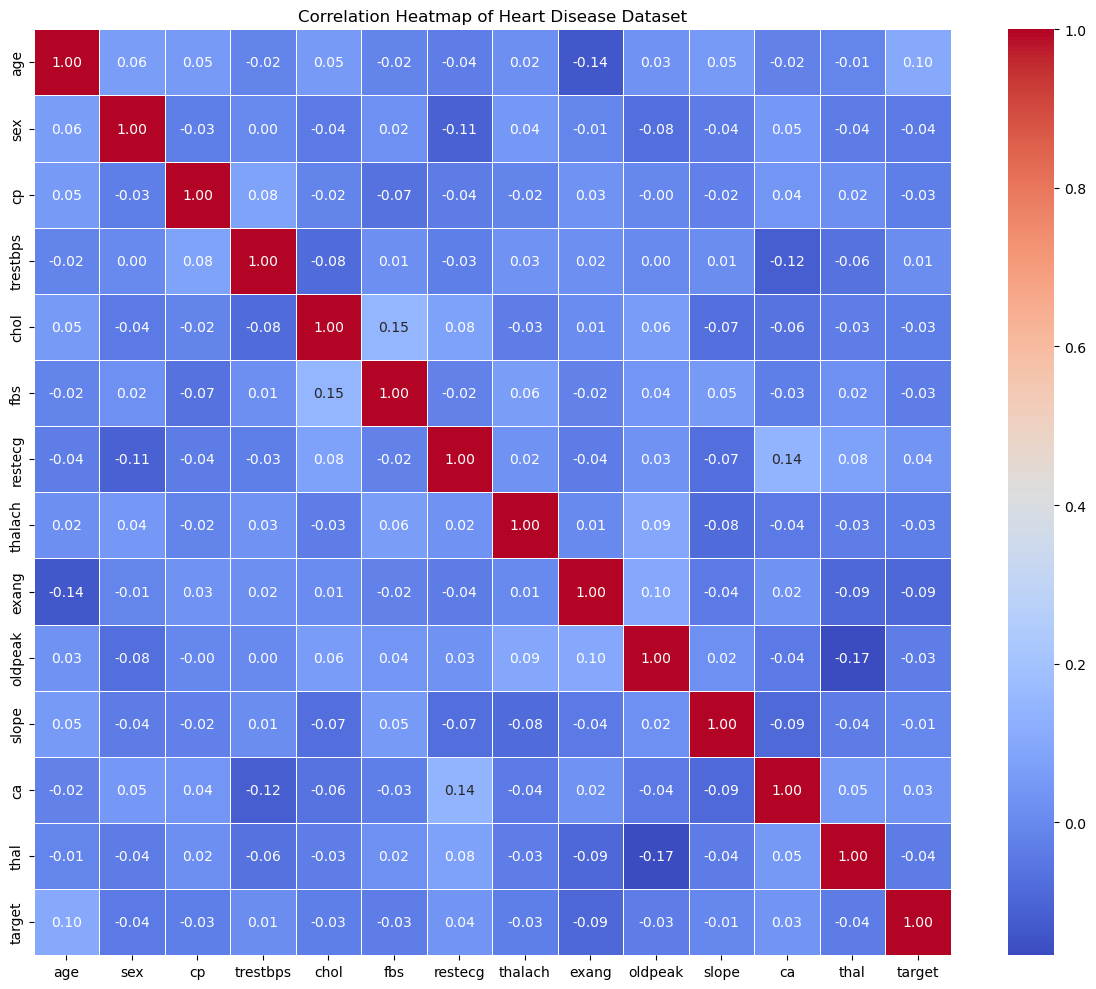


Dataset Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    55.076667    0.480000    1.583333  128.033333  241.090000    0.503333   
std     10.188727    0.500435    1.131661   20.225126   40.832252    0.500824   
min     22.000000    0.000000    0.000000   75.000000  138.000000    0.000000   
25%     49.000000    0.000000    1.000000  115.000000  212.000000    0.000000   
50%     55.000000    0.000000    2.000000  128.000000  239.000000    1.000000   
75%     61.250000    1.000000    3.000000  141.000000  268.250000    1.000000   
max     87.000000    1.000000    3.000000  189.000000  365.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.003333  151.603333    0.513333    0.978900    0.956667    1.570000   
std      

In [43]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.DataFrame({
    'BP': [120, 135, 110, 145, 130, 125, 118, 140, 122, 128],
    'FBS': [90, 110, 85, 120, 100, 95, 92, 115, 88, 105], 
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Age': [45, 62, 38, 55, 42, 50, 41, 58, 40, 48],
    'CP': ['No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'Heart Disease': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
})

# Encode the gender column
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1})

# Encode the CP column
data['CP'] = data['CP'].replace({'No': 0, 'Yes': 1})

# Split the data into features and target
X = data[['BP', 'FBS', 'Gender', 'Age', 'CP']]
y = data['Heart Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the dataset
heart_data = pd.DataFrame({
    'age': np.random.normal(55, 10, 300),  # Age centered around 55 years
    'sex': np.random.randint(0, 2, 300),   # 0 = female, 1 = male
    'cp': np.random.randint(0, 4, 300),    # Chest pain type (0-3)
    'trestbps': np.random.normal(130, 20, 300),  # Resting blood pressure
    'chol': np.random.normal(240, 40, 300),      # Cholesterol
    'fbs': np.random.randint(0, 2, 300),         # Fasting blood sugar
    'restecg': np.random.randint(0, 3, 300),     # Resting ECG
    'thalach': np.random.normal(150, 20, 300),   # Maximum heart rate
    'exang': np.random.randint(0, 2, 300),       # Exercise induced angina
    'oldpeak': np.random.normal(1, 0.5, 300),    # ST depression
    'slope': np.random.randint(0, 3, 300),       # Slope of ST segment
    'ca': np.random.randint(0, 4, 300),          # Number of vessels
    'thal': np.random.randint(0, 3, 300),        # Thalassemia
    'target': np.random.randint(0, 2, 300)       # Heart disease target
})

# Round numeric values to make them more realistic
heart_data['age'] = heart_data['age'].round()
heart_data['trestbps'] = heart_data['trestbps'].round()
heart_data['chol'] = heart_data['chol'].round()
heart_data['thalach'] = heart_data['thalach'].round()
heart_data['oldpeak'] = heart_data['oldpeak'].round(2)

# Check for missing values and unique values
missing_values = heart_data.isnull().sum()
unique_counts = heart_data.nunique()

# Create visualizations
plt.figure(figsize=(15, 12))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=heart_data, x='age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')

# Cholesterol Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=heart_data, x='chol', bins=20, kde=True, color='salmon')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')

# Max Heart Rate Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=heart_data, x='thalach', bins=20, kde=True, color='lightgreen')
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Count')

# Blood Pressure Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=heart_data, x='trestbps', bins=20, kde=True, color='orange')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nDataset Summary:")
print(heart_data.describe())

print("\nMissing Values:")
print(missing_values)

print("\nUnique Values Count:")
print(unique_counts)

# Additional analysis: Disease prevalence by gender
gender_disease = pd.crosstab(heart_data['sex'], heart_data['target'])
print("\nHeart Disease Prevalence by Gender:")
print(gender_disease)

# Additional analysis: Age groups and disease
heart_data['age_group'] = pd.cut(heart_data['age'], bins=[0, 40, 50, 60, 70, 100], labels=['<40', '40-50', '50-60', '60-70', '>70'])
age_disease = pd.crosstab(heart_data['age_group'], heart_data['target'])
print("\nHeart Disease Prevalence by Age Group:")
print(age_disease)

In [37]:
import pandas as pd

# Load the file as a CSV
file_path = '/Users/prem/Documents/heart.csv.xls'  # Replace with the actual file path
heart_data = pd.read_csv(file_path)

# Preview the first few rows to confirm successful loading
print(heart_data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [39]:
# 1. Inspect the data
print(heart_data.info())  # Check for data types and missing values
print(heart_data.describe())  # Summary statistics

# 2. Separate features and target variable
X = heart_data.drop(columns='target')  # Replace 'target' with the actual column name if different
y = heart_data['target']

# 3. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Make predictions and evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = nb_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/Users/prem/Documents/heart.csv.xls'  # Replace with the actual file path
heart_data = pd.read_csv(file_path)

# Separate features and target variable
X = heart_data.drop(columns='target')
y = heart_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' as needed
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8341463414634146
Confusion Matrix:
 [[79 23]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/Users/prem/Documents/heart.csv.xls'  # Replace with your actual path
heart_data = pd.read_csv(file_path)

# Separate features and target variable
X = heart_data.drop(columns='target')  # Adjust 'target' if your target column has a different name
y = heart_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer 1
    Dense(8, activation='relu'),   # Hidden layer 2
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5613 - loss: 0.6400 - val_accuracy: 0.6890 - val_loss: 0.6132
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7360 - loss: 0.5702 - val_accuracy: 0.7805 - val_loss: 0.5647
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.5153 - val_accuracy: 0.7988 - val_loss: 0.5149
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8230 - loss: 0.4431 - val_accuracy: 0.8110 - val_loss: 0.4670
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8439 - loss: 0.3608 - val_accuracy: 0.8049 - val_loss: 0.4359
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8544 - loss: 0.3273 - val_accuracy: 0.8232 - val_loss: 0.4200
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8869 - loss: 0.2916 - val_accuracy: 0.8232 - val_loss: 0.4138
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8968 - loss: 0.2691 - val_accuracy: 0.8354 - val_loss: 0.4114
Epo